## Курбанова Комила, БПМИ218

# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

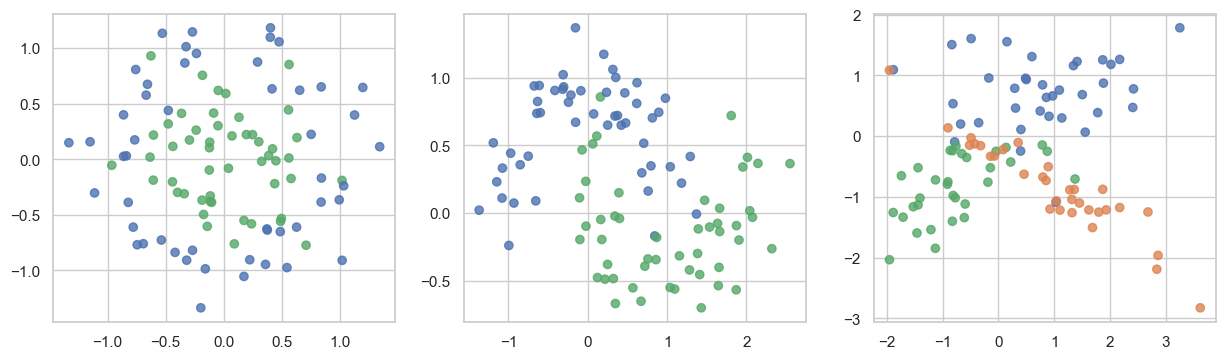

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

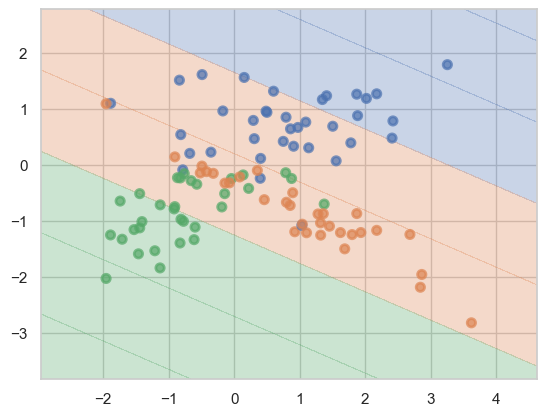

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.metrics import accuracy_score

def tree_for_dataset(num, name):
    X, y = datasets[num]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    decision_tree  = DecisionTreeClassifier().fit(X_train, y_train)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plot_surface(decision_tree, X_train, y_train)
    plt.title(f'Training set for {name}')
    train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
    print(f'{name}: train accuracy = ', train_accuracy)

    plt.subplot(1, 2, 2)
    plot_surface(decision_tree, X_test, y_test)
    plt.title(f'Test set for {name}')
    test_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
    print(f'{name}: test accuracy = ', test_accuracy)

    plt.tight_layout()
    plt.show()

make_circles: train accuracy =  1.0
make_circles: test accuracy =  0.65


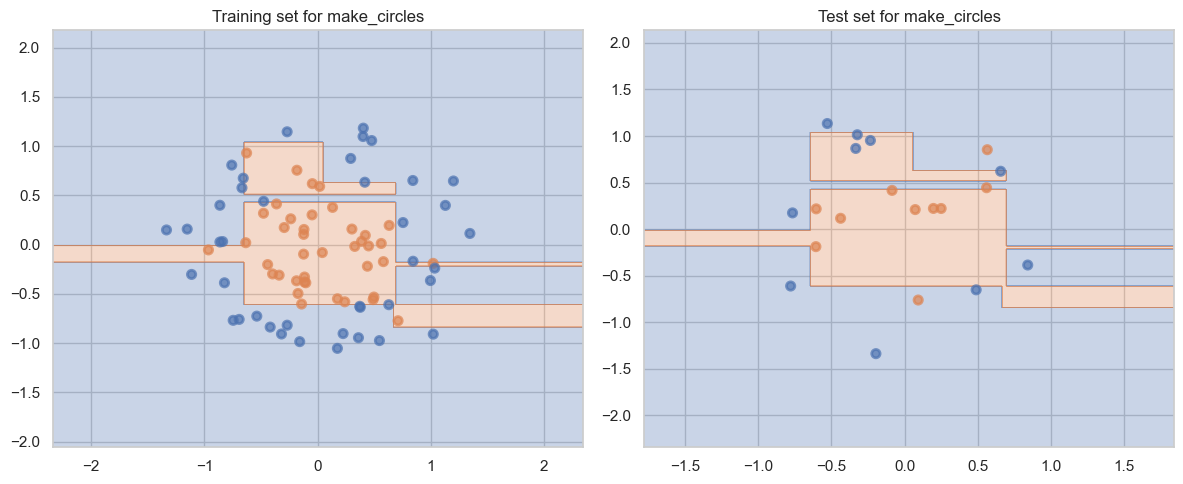

In [8]:
tree_for_dataset(0, 'make_circles')

make_moons: train accuracy =  1.0
make_moons: test accuracy =  0.9


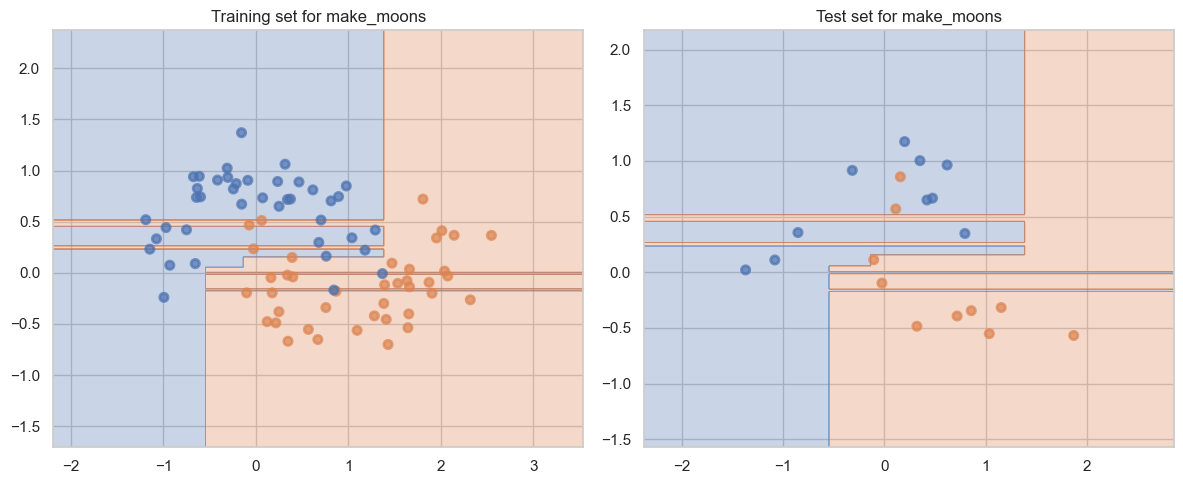

In [9]:
tree_for_dataset(1, 'make_moons')

make_classification: train accuracy =  1.0
make_classification: test accuracy =  0.65


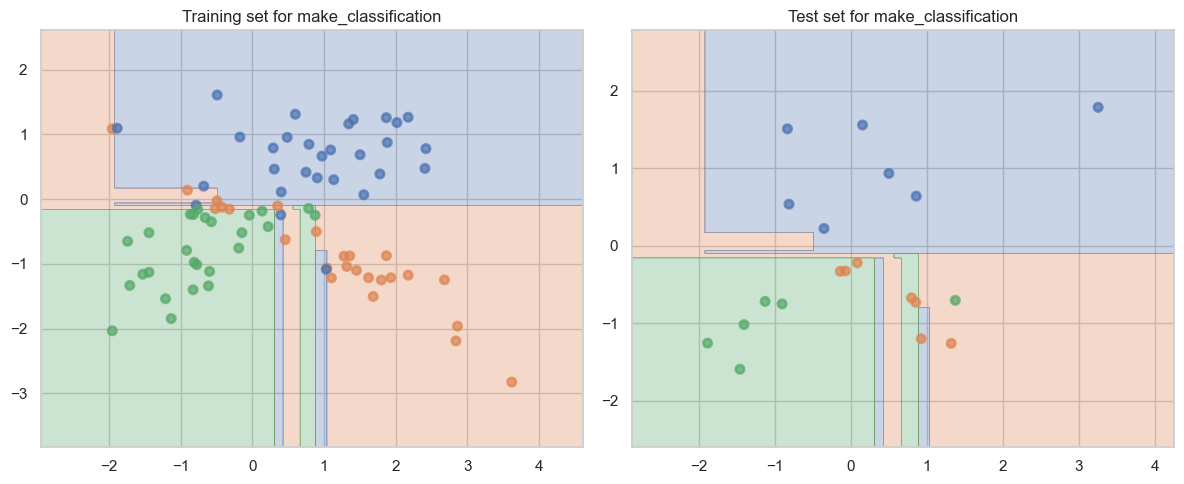

In [10]:
tree_for_dataset(2, 'make_classification')

__Ответ:__

Модели выдают accuracy = 1, потому что деревья так построились. В целом, эффект переобучения есть, потому что поверхности получились немного мудреными и это можно видеть по результатам на тесте, но он не такой сильный, т.к. выборки не особо большие. Иначе был бы просто какой-то пазл, повторяющий обучающую выборку. Довольно неплохой результат accuracy

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [11]:
def grid_params(X_train, X_test, y_train, y_test, name):
    plt.figure(figsize=(14, 14))
    plt.suptitle(f'{name} dataset', fontsize=16, y=1)
    for i, max_depth in enumerate([2, 4, 6, 10]):
        for j, min_samples_leaf in enumerate([25, 15, 5, 1]):
            decision_tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
            plt.subplot2grid((4, 4), (i, j))
            plot_surface(decision_tree, X_train, y_train)
            train_accuracy = np.round(accuracy_score(y_train, decision_tree.predict(X_train)), 4)
            test_accuracy = np.round(accuracy_score(y_test, decision_tree.predict(X_test)), 4)
            plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf) + '\n\n' +
                       'train accuracy=' + str(train_accuracy) + '\n' +
                       'test accuracy=' + str(test_accuracy))

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

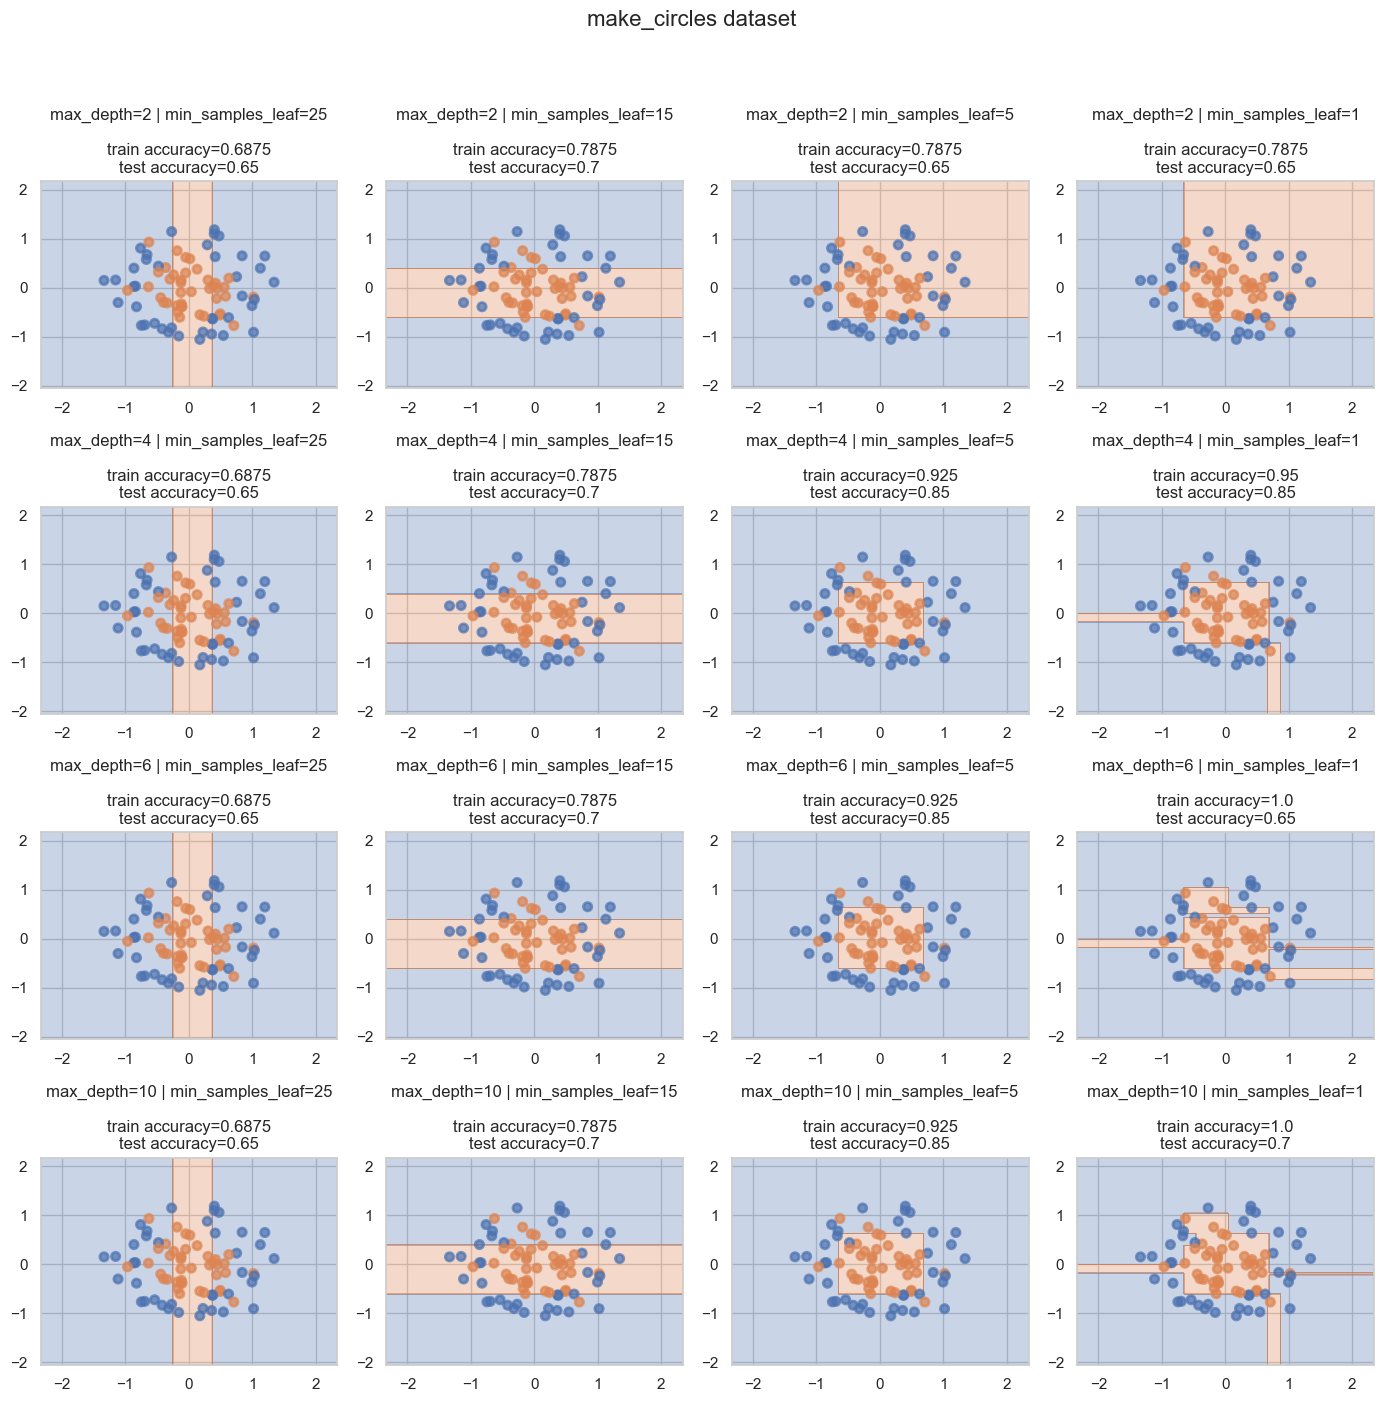

In [12]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
grid_params(X_train, X_test, y_train, y_test, 'make_circles')

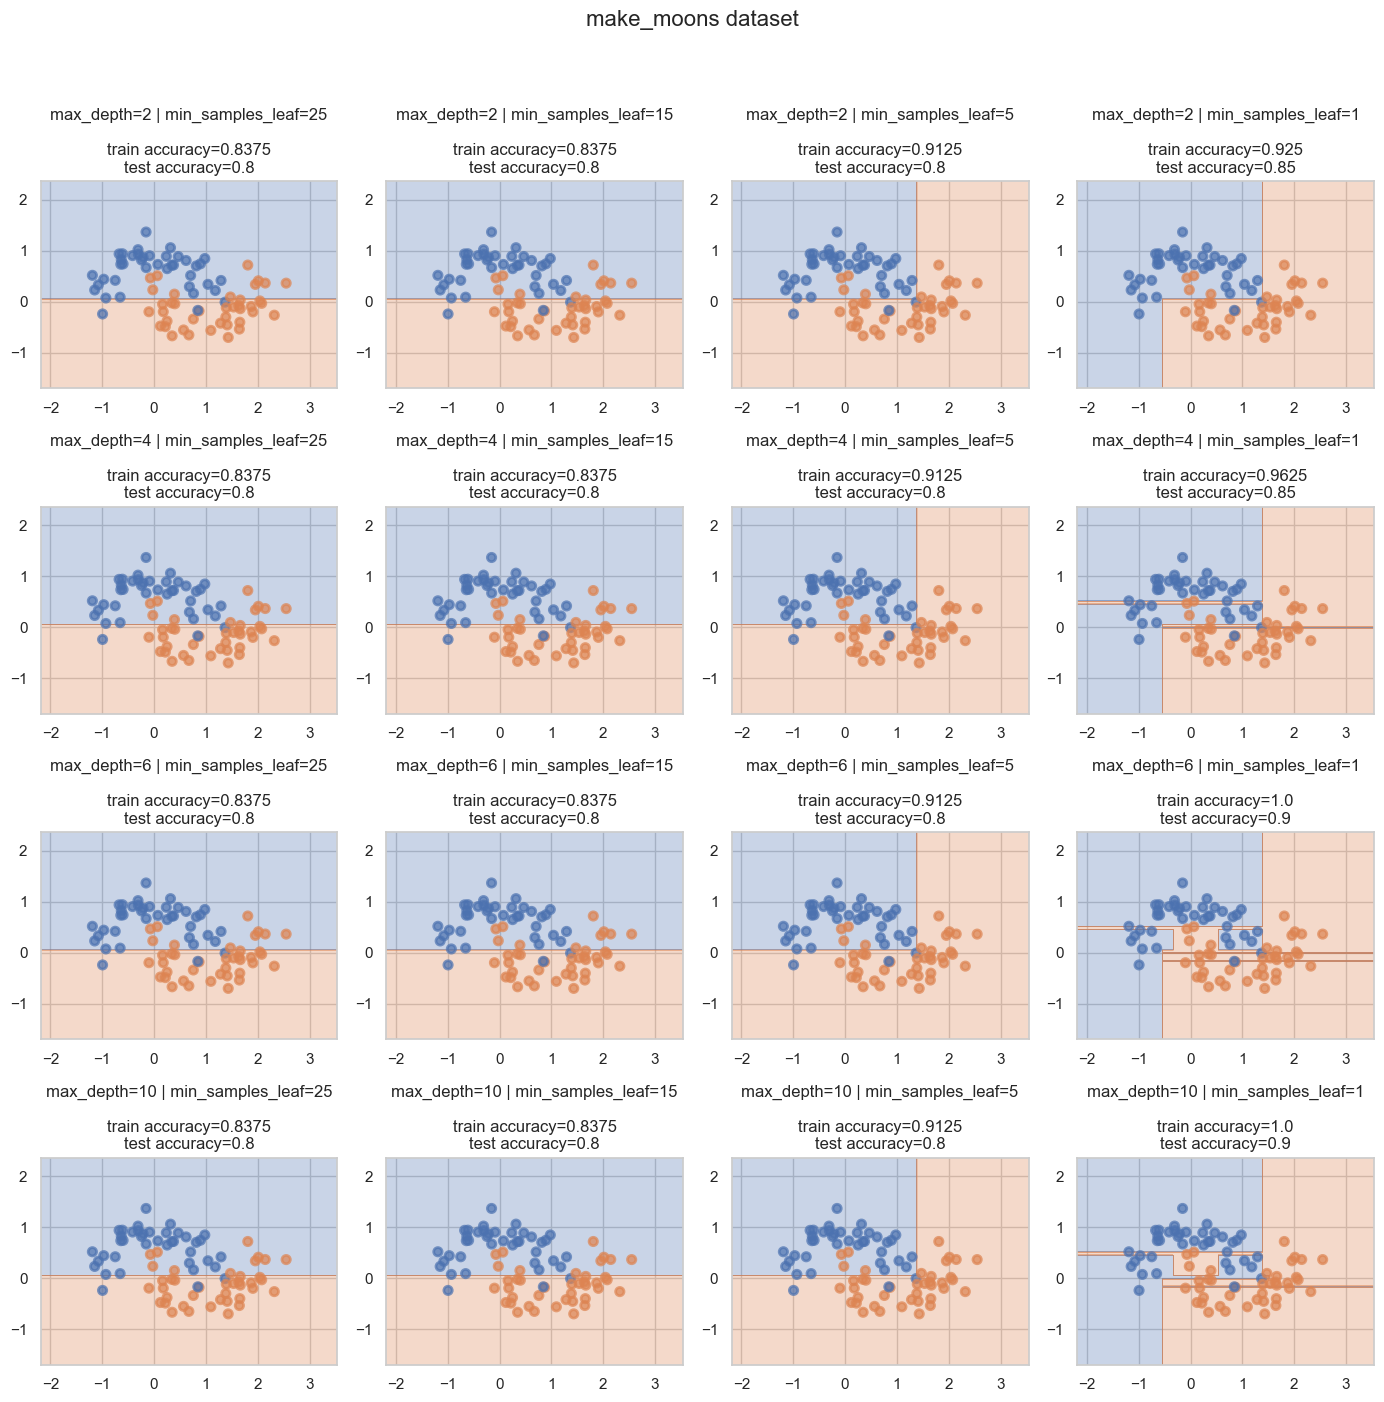

In [13]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
grid_params(X_train, X_test, y_train, y_test, 'make_moons')

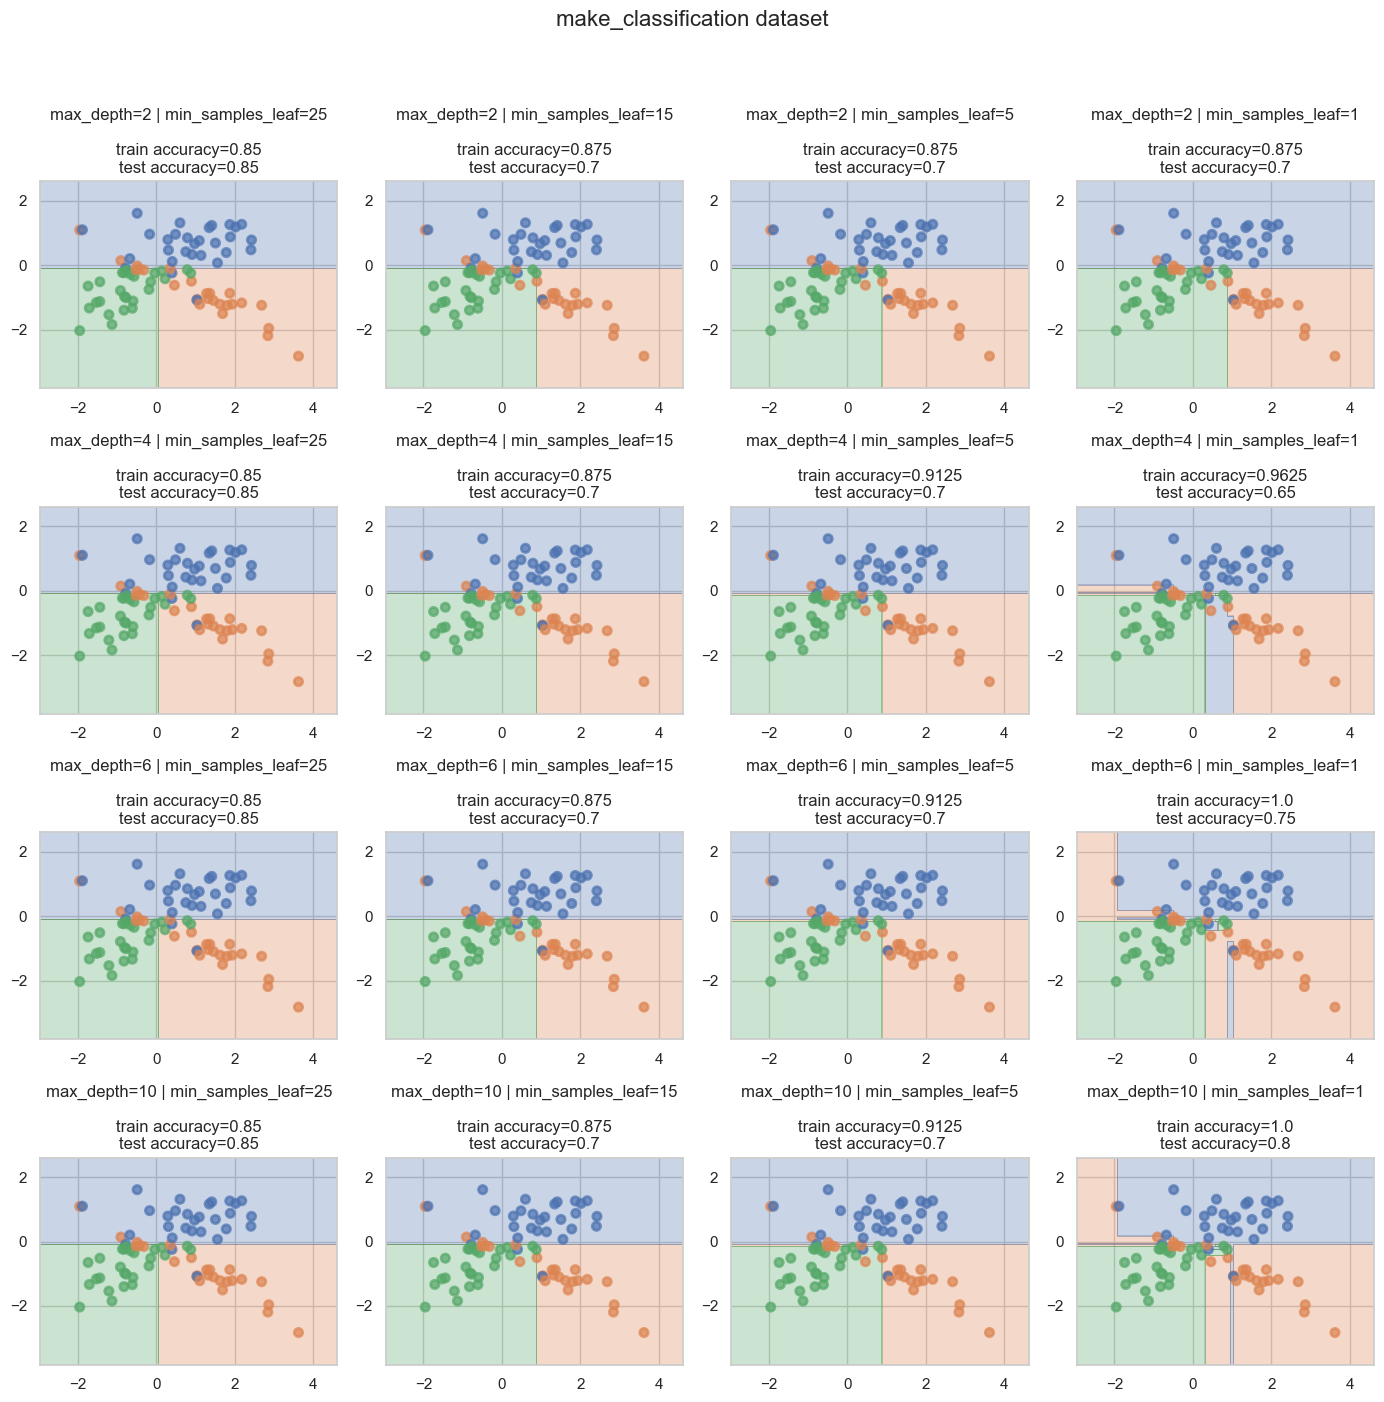

In [14]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
grid_params(X_train, X_test, y_train, y_test, 'make_classification')

__Ответ:__

В целом, для в сех датасетов можно сказать, что:

* Чем глубже мы разрешаем построить дерево, тем больше оно переобучается (но надо внимательно смотреть за структурой данных, потому что может недообучиться из-за милипусечной глубины)

* Чем меньше объектов в листьях требуем, тем больше переобучаемся

Здесь может быть не так хорошо это видно по accuracy, но по графикам прям отчетливо заметно, как усложняется разделяющая поверхность при увеличении максимальной глубины и уменьшении минимального количества объектов в листе

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

[Ссылка на посылку задачи А в контесте](https://contest.yandex.ru/contest/56884/run-report/102438960/)

Логин krkurbanova@edu.hse.ru

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
df = pd.read_csv('students.csv')
df.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


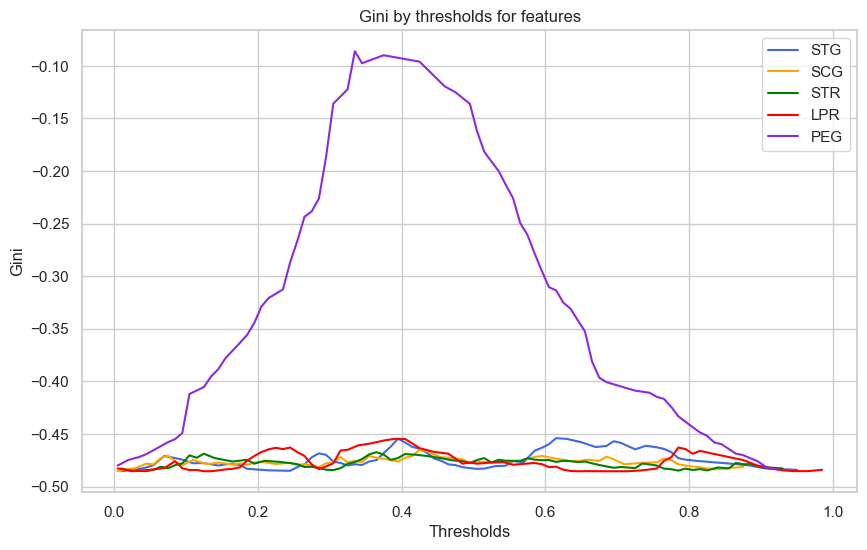

In [16]:
from hw5code import find_best_split

plt.figure(figsize=(10, 6))

features = df.columns[:-1]
colors = ['royalblue', 'orange', 'green', 'red', 'blueviolet']
for i in range(len(features)):
    feature_name = features[i]
    therholds, ginis, threshold_best, gini_best = find_best_split(df[feature_name].to_numpy(), df['UNS'].to_numpy())
    plt.plot(therholds, ginis, label=feature_name, c=colors[i])

plt.title('Gini by thresholds for features')
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Gini')

plt.show()

In [17]:
def UNS_by_feature(data, feature_name, target, ax, color):
    ax.scatter(data[feature_name].to_numpy(), target.to_numpy(), s=300, alpha=0.5, c=color, label=feature_name)
    ax.set_title(f'UNS by {feature_name}')
    ax.set_xlabel(f'{feature_name} value')
    ax.set_ylabel('UNS value')

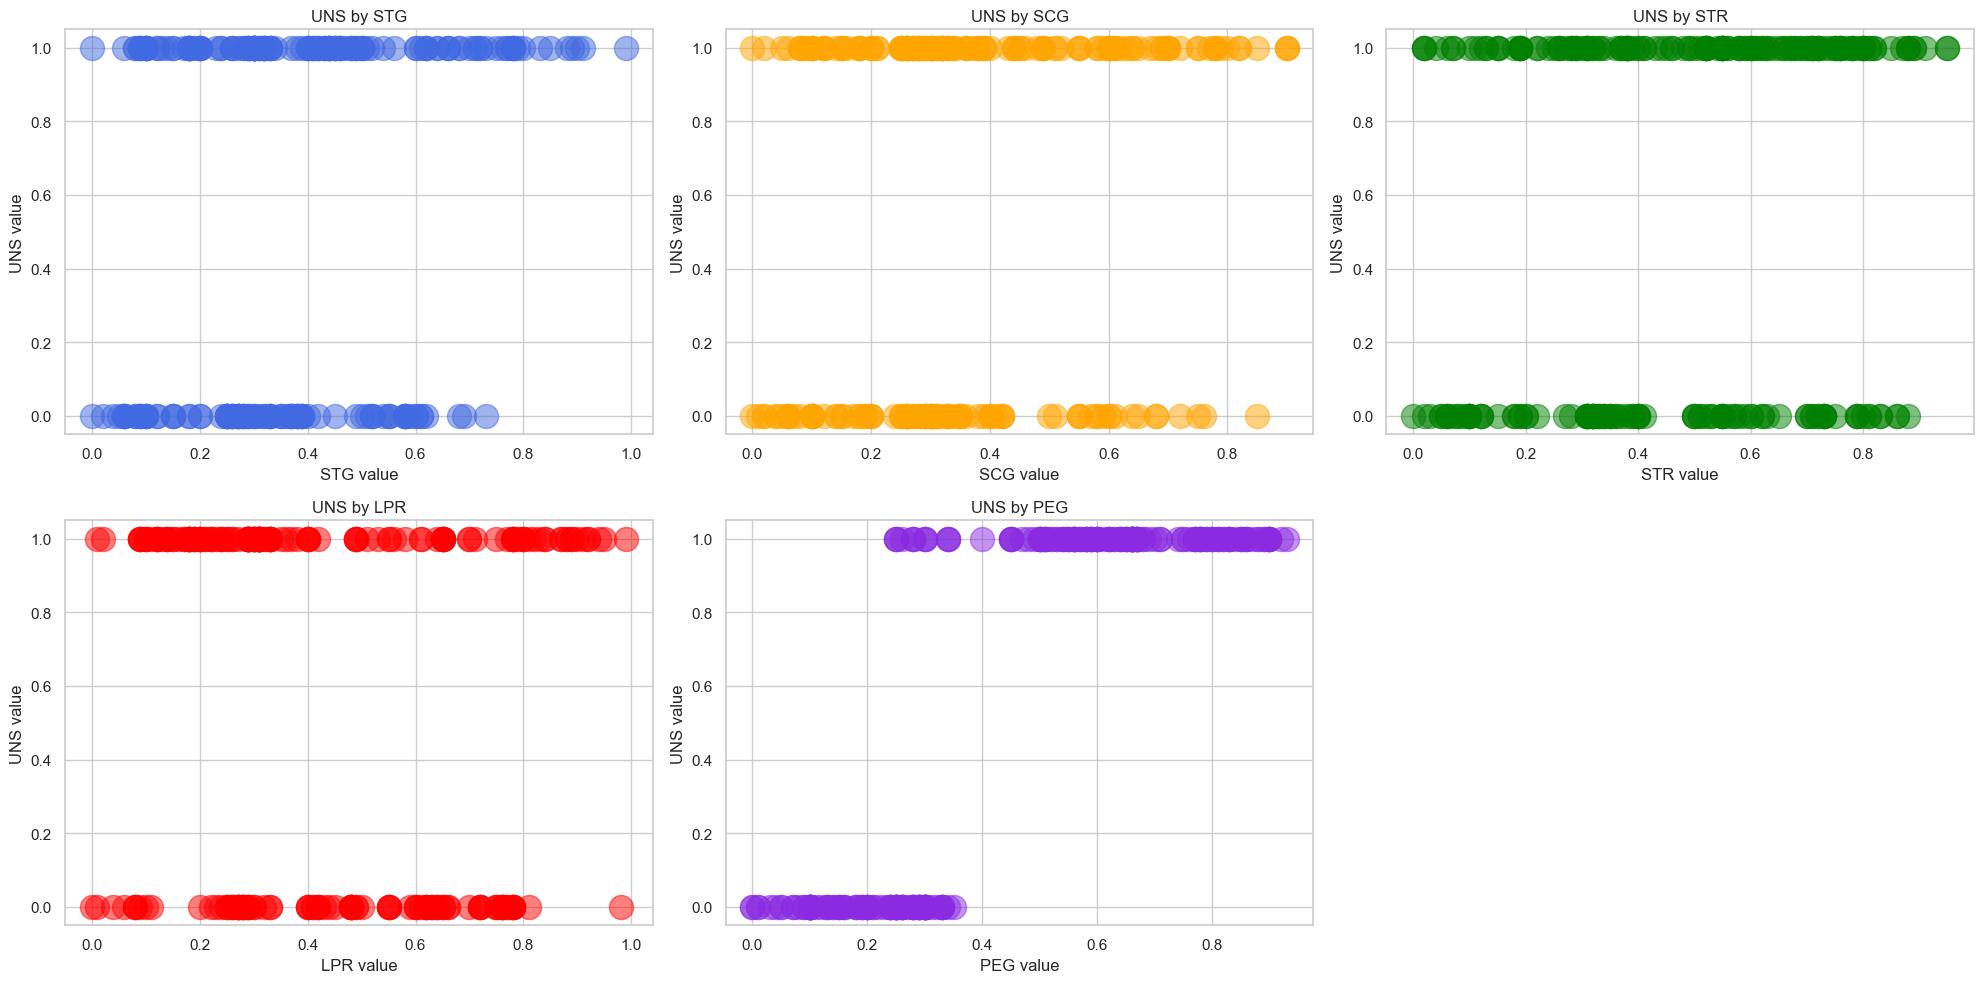

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(features)):
    UNS_by_feature(df, features[i], df['UNS'], axs[i//3, i%3], colors[i])
fig.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

По обоим графикам видно, что лучшим разбиением будет PEG, потому что у этого признака критерий Джини ближе всего к нулю (ну и он по сравнению с остльными на первом графике не выглядит, как что-то очень малозначимое и шумное). 

По scatter-графикам можно сказать, что опять-таки PEG единственный адекватный признак. В моем понимании признак хорош, если мы можем мысленно построить сигмоиду на графике и она более или менее нормально разделяет классы (то есть классы должны визуально быть разделимыми)

Видимо, кривая значений Джини для хороших признаков близка к параболе с вершиной около нуля, причем в вершине наше оптимальное значение Джини. А у "так-себе-признаков" что-то далекое от нуля и шумное

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».


[Ссылка на посылку задачи B в контесте](https://contest.yandex.ru/contest/56884/run-report/102616026/)

Логин krkurbanova@edu.hse.ru

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [19]:
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=0), df[0], test_size=0.5, random_state=42)

In [22]:
from hw5code import DecisionTree

feature_types = ['categorical'] * len(X_train)

tree = DecisionTree(feature_types)
tree.fit(X_train.to_numpy(), y_train.to_numpy())

print(f'Train accuracy: {accuracy_score(y_train, tree.predict(X_train.to_numpy()))}')
print(f'Test accuracy: {accuracy_score(y_test, tree.predict(X_test.to_numpy()))}')

Train accuracy: 1.0
Test accuracy: 1.0


In [23]:
print(tree.get_tree_size())

5


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [24]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [25]:
df = df.apply(LabelEncoder().fit_transform)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='V10'), df['V10'], test_size=0.2, random_state=42)

In [27]:

def plot_acc_by_param(name, train_acc, test_acc):
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc, label='Train score', color='magenta')
    plt.plot(test_acc, label='Test score', color='blueviolet')

    plt.title(f'Accuracy by tree {name} param')
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


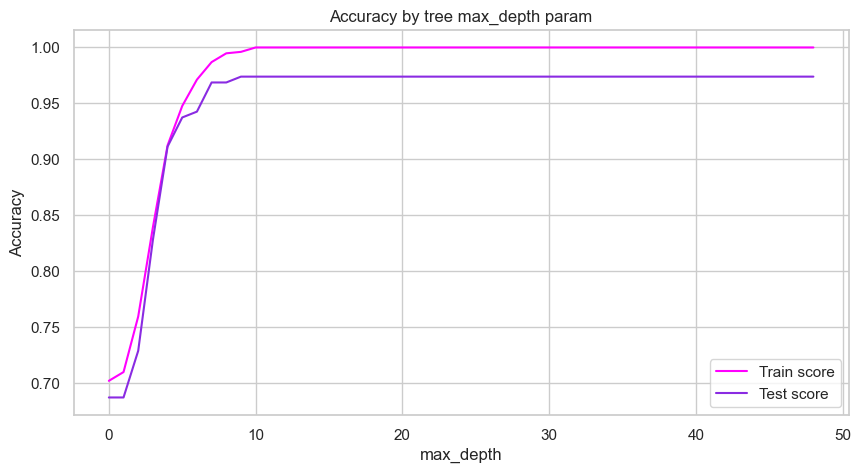

In [28]:
feature_types = ['categorical'] * len(X_train)

train_acc, test_acc = [], []

for depth in range(1, 50):
    tree = DecisionTree(feature_types, max_depth=depth)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())

    train_acc.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_acc.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))

plot_acc_by_param('max_depth', train_acc, test_acc)

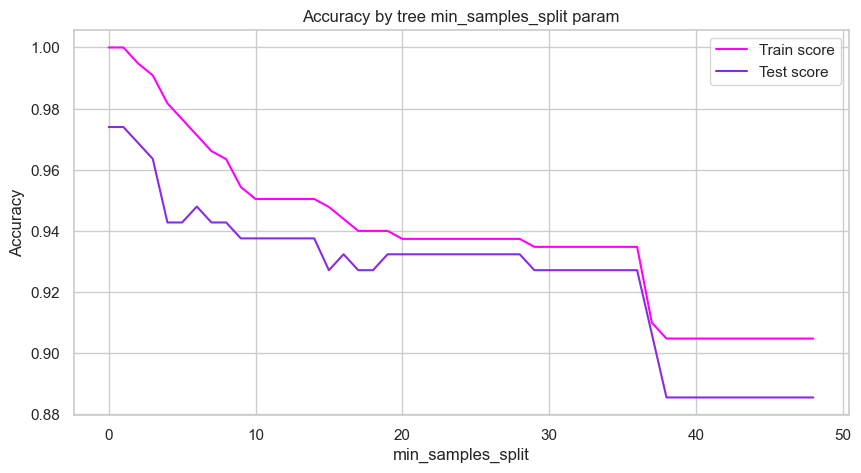

In [29]:
feature_types = ['categorical'] * len(X_train)

train_acc, test_acc = [], []

for sample_split in range(1, 50):
    tree = DecisionTree(feature_types, min_samples_split=sample_split)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())

    train_acc.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_acc.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))

plot_acc_by_param('min_samples_split', train_acc, test_acc)

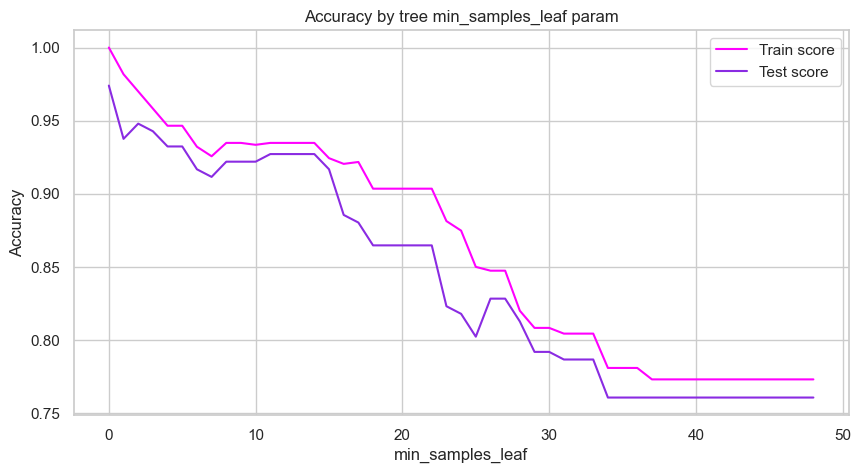

In [30]:
feature_types = ['categorical'] * len(X_train)

train_acc, test_acc = [], []

for sample_leaf in range(1, 50):
    tree = DecisionTree(feature_types, min_samples_leaf=sample_leaf)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())

    train_acc.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_acc.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))

plot_acc_by_param('min_samples_leaf', train_acc, test_acc)

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder    

In [32]:
mushrooms = pd.read_csv("agaricus-lepiota.data", header=None)
mushrooms.head(5) 

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
tic_tac_toe = pd.read_csv("tic-tac-toe-endgame.csv")
tic_tac_toe.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [34]:
cars = pd.read_csv("car.data", header=None)
cars.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
nursery = pd.read_csv("nursery.data", header=None)
nursery.head(10)

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [36]:
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)

In [37]:
cars.replace({6: {'unacc': 0, 'acc': 0, 'good' : 1, 'vgood': 1}}, inplace=True)
nursery.replace({8: {'not_recom': 0, 'recommend' : 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}}, inplace=True)

cars = cars.apply(LabelEncoder().fit_transform)
nursery = nursery.apply(LabelEncoder().fit_transform)

In [38]:
datasets = {
    'mushrooms' : (mushrooms.drop(columns=0).values, mushrooms[0].values),
    'tic-tac-toe' : (tic_tac_toe.drop(columns='V10').values, tic_tac_toe['V10'].values),
    'cars' : (cars.drop(columns=6).values, cars[6].values),
    'nursery' : (nursery.drop(columns=8).values, nursery[8].values)
}

In [39]:
from collections import defaultdict

accuracy_table = defaultdict(dict)
for dataset_name, (X, y) in datasets.items():
    feature_types = ['real'] * X.shape[1]
    tree = DecisionTree(feature_types)
    accuracy_table[dataset_name]['real'] = np.mean(cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)))

    feature_types = ['categorical'] * X.shape[1]
    tree = DecisionTree(feature_types)
    accuracy_table[dataset_name]['categorical'] = np.mean(cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)))

    X_ohe = np.concatenate((X, OneHotEncoder(sparse=False).fit_transform(X)), axis=1)
    feature_types = np.concatenate((['real'] * X.shape[1], ['categorical'] * (X_ohe.shape[1] - X.shape[1])))
    tree = DecisionTree(feature_types)
    accuracy_table[dataset_name]['real_ohe'] = np.mean(cross_val_score(tree, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score)))

    tree = DecisionTreeClassifier()
    accuracy_table[dataset_name]['sklearn'] = np.mean(cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)))

In [42]:
accuracy_table

defaultdict(dict,
            {'mushrooms': {'real': 0.9992610837438424,
              'categorical': 1.0,
              'real_ohe': 0.9996305418719211,
              'sklearn': 0.9611225225552747},
             'tic-tac-toe': {'real': 0.4675328947368421,
              'categorical': 0.5414583333333333,
              'real_ohe': 0.5487719298245614,
              'sklearn': 0.7925438596491229},
             'cars': {'real': 0.9426468611372497,
              'categorical': 0.9675460411345611,
              'real_ohe': 0.919495227853206,
              'sklearn': 0.9427073531388628},
             'nursery': {'real': 0.9996913580246914,
              'categorical': 0.9998456790123458,
              'real_ohe': 0.9996913580246914,
              'sklearn': 0.9996913580246914}})

In [40]:
accuracy_df = pd.DataFrame.from_dict(accuracy_table, orient='index')
accuracy_df

,real,categorical,real_ohe,sklearn
mushrooms,0.999261,1.000000,0.999631,0.961123
tic-tac-toe,0.467533,0.541458,0.548772,0.792544
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999691,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [49]:
sorted_df = accuracy_df.apply(lambda x: x.sort_values(ascending=False).index.tolist(), axis=1)
sorted_df

mushrooms      [categorical, real_ohe, real, sklearn]
tic-tac-toe    [sklearn, real_ohe, categorical, real]
cars           [categorical, sklearn, real, real_ohe]
nursery        [categorical, real, real_ohe, sklearn]
dtype: object

**Ответ:**

* __mushrooms__ – тут самосделанные деревья дают очень хорошее качество очень близко к 1, все круто, а вот sklearn не очень хорош

* __tic-tac-toe__ – здесь какая-то яма по качеству и для sklearn-овского дерева, и для написанного нами. У меня есть две идеи, что происходит: 1) в датасете есть расположение крестиков и ноликов по их координатам, но мы ничего не знаем об их расположении относительно друг друга (мб если бы добавили признаки, то было бы лучше качество) 2) наши деревья переобучились, а sklearn дерево умнее и обладает лучшей обобщающей способностью

* __cars__ – хорошо-прикольно, но не прям близко к 1

* __nyrsery__ – просто песня, очень вкусно: вообще все деревья выбили скор больше 0.999

Вывод по таблице рейтинговой выше очень хорошо прослеживается: все, кроме tic-tac-toe, лучше обучаются, если все признаки считать категориальными (судя по описанию датасетов, они изначально категориальные). Глобально следующим вариантов будет real, и только потом real + OHE. 

Случайности тут немного, мы не делим выборку на трейн и тест, потому что используем кросс-валидацию, и используем критерий Джини. А вот в sklearn, если я правильно поняла, при поиске лучшего разделения используется random_state:
>The features are always randomly permuted at each split, even if splitter is set to "best"

Вставьте что угодно, описывающее ваши впечатления от этого задания:


![](https://pm1.aminoapps.com/8839/9aaef0680f62066b0a2e6e89f1f9ed2d15af65efr1-564-845v2_00.jpg)

![](https://i.pinimg.com/736x/c6/11/ea/c611eaa96882013494ba8dfd5a18d32e.jpg)

![](https://sun1-56.userapi.com/impg/nm9RpriCiJlKMNYwnqYjb-2hexwZMUd2QLkscg/OU2ACAoPTyQ.jpg?size=807x807&quality=96&sign=6ab899812400cb6d1c0d257b95ad3bab&c_uniq_tag=DV5JRL7F3nyx6tjOC-rrAg5ZPVql_Y43kSxobQRG-cw&type=album)